# Ejercicio 2

**a)** Desarrolle métodos para generar las siguientes variables aleatoria
- i) Distribución Pareto
$$
f(x) = a x^{-(a+1)} \quad 1 \leq x < \infty, \quad a > 0
$$

- ii) Distribución Erlang
$$
f(x) = \frac{x^{k-1} e^{-x/\mu}}{(k - 1)! \, \mu^k} \quad 0 \leq x < \infty, \quad \mu > 0, \quad k \in \mathbb{Z}
$$

- iii) Distribución Weibull
$$
f(x) = \frac{\beta}{\lambda} \left( \frac{x}{\lambda} \right)^{\beta - 1} e^{-(x/\lambda)^\beta} \quad 0 \leq x, \quad \lambda > 0, \quad \beta > 0
$$

*Ayuda*: la distribución Pareto y la distribución Weibull tienen distribución acumulada F con forma
cerrada, por lo cual puede aplicarse el método de la transformada Inversa. La distribución de Erlang
pertenece a la familia de las Gammas. Puede simularse por rechazo o como suma de exponenciales.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import factorial, e, log
from scipy.special import gamma
from random import random

---
## Desarrollo
**i)** Utilizando la ayuda para desarrollar un método para generar una variable aleatoria con *distribución de Pareto* utilizamos el *método de forma cerrada*, por ende aplicamos el método de la transformada inversa.

## DENSIDAD DE PARETO

In [7]:
def Pareto_density(x:float, a:float) -> float:
    """
    Función de densidad de Pareto

    Args:
        x (float): Valor de entrada a conocer la densidad
        a (float): Parámetro de Pareto adicional

    Returns:
        float: Densidad de x
    """
    return np.where(
        (x >= 1) & (a > 0), (a*x) ** -(a+1), 0
    )

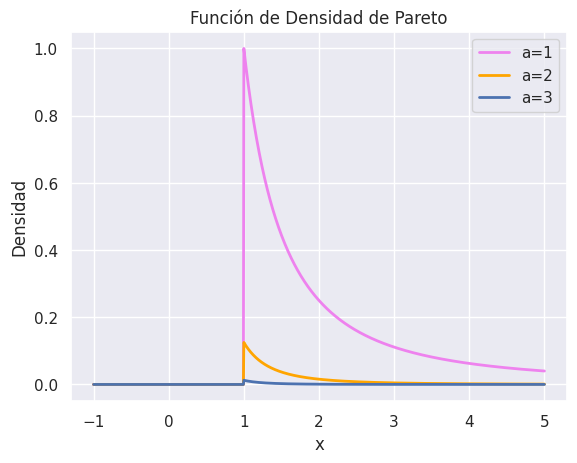

In [20]:
x = np.linspace(-1, 5, 1000)
a_1 = 1 
a_2 = 2
a_3 = 3

sns.set_theme(style='darkgrid')
sns.lineplot(x=x, y=Pareto_density(x=x, a=a_1), linewidth=2, color="violet", label="a=1")
sns.lineplot(x=x, y=Pareto_density(x=x, a=a_2), linewidth=2, color="orange", label="a=2")
sns.lineplot(x=x, y=Pareto_density(x=x, a=a_3), linewidth=2, label="a=3")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.title("Función de Densidad de Pareto")
plt.show()

Para encontrar F para Pareto debemos aplicar el método de la *transformada inversa*.
Primero debemos encontrar F(x) y luego despejar x en función de U.

Por otro lado, tenemos que 
\begin{equation*}
F(x) = \int_{-\infty}^{x} f(t) dt
\end{equation*}

Al calcular la función de distribución acumulada (En papel) resulta:
\begin{equation*}
    F(x) = 
    \begin{cases}
    0 & \text{si } x < 1\\[0.4cm]
    \frac{1}{x^a} + 1 & \text{si }1 \leq x \wedge a > 0\\[0.4cm]
    1 & \text{si } x\rightarrow \infty
    \end{cases}
\end{equation*}

Al calcular la inversa de $F(x) = U$ donde $U \in [0,1]$ tenemos que:
$$
\displaystyle x = \sqrt[a]{\frac{1}{1-U}}
$$

- Como x $\in [1,\infty)$ verifico que la ecuación está en el intervalo.
- Evalúo en $U = -\frac{1}{x^a} + 1$ para $x=1, Sup. que a=1 \wedge \lim_{x \to \infty} F(X) \wedge a=1 $ (Los extremos)
- Obtengo que $U = 0 \wedge U=1$ respectivamente 
- Tras evaluar en la ecuacion resulta que está en el intervalo $[1,\infty)$ para todo $U \in [0,1]$

Finalmente el algoritmo para generar la variable aleatoria:

In [6]:
def F_Pareto(alpha:float) -> float:
    """
    Función de distribución acumulada de Pareto

    Args:
        a (float): Parámetro de Pareto

    Returns:
        float: Valor acumulado hasta
    """
    U = random()
    return (1-U) ** -(1/alpha)

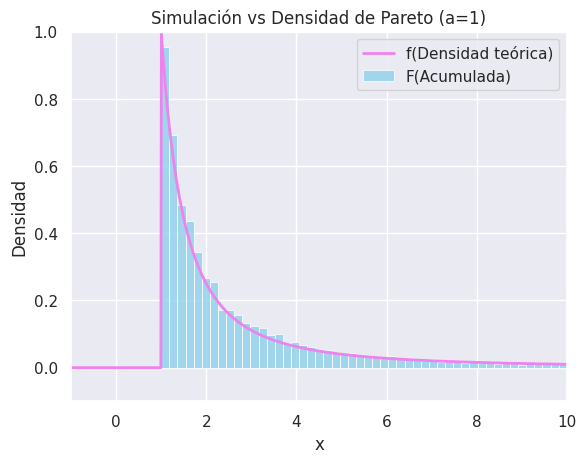

In [ ]:
Nsim = 10_000
a = 1
simulations = [F_Pareto(alpha=a) for _ in range(Nsim)]
"""
Pareto tiene varianza infinita si a <= 1
Por ende es necesario filtrar el rango de los valores
para mostrar en la gráfica
"""
simulations_cut = [s for s in simulations if 1 <= s <= 10] 

x = np.linspace(-1, 10, 1000)  

sns.lineplot(x=x, y=Pareto_density(x=x, a=a), linewidth=2, color="violet", label="f(Densidad teórica)")
sns.histplot(simulations_cut, stat='density', color='skyblue', bins=50, label="F(Acumulada)")

plt.xlim(-1, 10)
plt.ylim(-0.1, 1)
plt.xlabel("x")
plt.ylabel("Densidad")
plt.title("Simulación vs Densidad de Pareto (a=1)")
plt.legend()
plt.show()


---
## DENSIDAD DE ERLANG


In [9]:
def Erlang_density(x:float, mu:float, k:int) -> float:
    """
    Función de densidad de Erlang

    Args:
        x  (float): Valor de entrada a conocer la densidad
        mu (float): Parámetro de Erlang adicional
        k  (int): Parámetro de Erlang adicional

    Returns:
        float: Densidad de x
    """
    return np.where(
        (x >= 0) & (mu > 0), ((x ** (k-1)) * (e ** (-x / mu))) / (factorial(k-1) * (mu ** k)), 0
    )

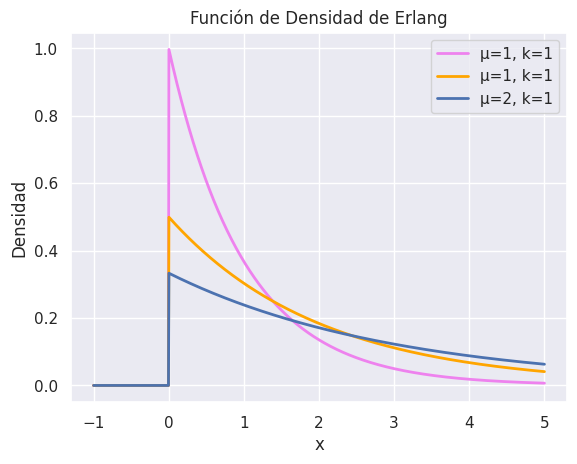

In [31]:
x = np.linspace(-1, 5, 1000)
values_1 = (1, 1) #Mu, K
values_2 = (2, 1)
values_3 = (3, 1)

sns.set_theme(style='darkgrid')
sns.lineplot(x=x, y=Erlang_density(x=x, mu=values_1[0], k=values_1[1]), linewidth=2, color="violet", label="μ=1, k=1")
sns.lineplot(x=x, y=Erlang_density(x=x, mu=values_2[0], k=values_2[1]), linewidth=2, color="orange", label="μ=1, k=1")
sns.lineplot(x=x, y=Erlang_density(x=x, mu=values_3[0], k=values_3[1]), linewidth=2, label="μ=2, k=1")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.title("Función de Densidad de Erlang")
plt.show()

## PRIMER INTENTO: ERRÓNEO

Para encontrar F para Erlang debemos aplicar el *método de rechazo* ó como *suma de exponenciales*.

En este caso voy a utilizar el *método de rechazo*.

Esto es por que la densidad de Erlang viene de la familia de las Gammas.

Primero, así como en el caso de generar variables aleatorias discretas con el *método de rechazo*, se puede probar que:
- La variable aleatoria generada por el algoritmo de `rejection_method()` tiene densidad *f*
- El úmero de iteraciones del algoritmo es una variable aleatoria *Geométrica* con media *c*

Entonces, para generar $X$ rechazando contra una variable $Y$, es necesario determinar $c$, la cual es la cota para el cociente $\frac{f(x)}{g(x)}$, válida $\forall x \in \mathbb{R}$

Se debe considerar la función:
$$
h(x) = \frac{f(x)}{g(x)}, \quad x \text{ tal que } f(x)\neq 0,
$$

Y para esta función se debe determinar:
- **(a)** Puntos Críticos: $f'(x)=0 \text{ o } f'(x) \text{ no existe}$
- **(b)** Analizar cuáles de estos puntos corresponden a máximos locales
- **(c)** Evaluar $h$ en los extremos de su dominio, si es acotado, o los límites correspondientes.
- **(d)** Elegir una cota a partir de los valores obtenidos en **(b)** y **(c)**

Tenemos que la **Densidad de Erlang** es tal que:
$$
f(x) = \frac{x^{k-1} e^{\frac{-x}{\mu}}}{(k - 1)! \, \mu^k} \quad 0 \leq x < \infty, \quad \mu > 0, \quad k \in \mathbb{Z}
$$

Como 
$$
f(x) = \frac{x^{k-1} e^{\frac{-x}{\mu}}}{(k - 1)! \, \mu^k} \cdot \mathbb{I}_{(0,1)}(x) \neq \text{ en } (0,1) \Longrightarrow \text{ Utilizo } Y \thicksim \mathcal{U}(0,1) \\[0.3cm]

\text{Propongo } g(x) = 1 \forall x \in (0,1)\\[.3cm]

\displaystyle \therefore  h(x) = \frac{f(x)}{g(x)} = f(x) \quad \forall x \in (0,1)
$$

Analizamos $h(x)$:
- Resulta que $h'(x)$ está dada por:
$$
h'(x) = \frac{1}{(k-1)! \, \mu^k} \cdot e^{-x/\mu} \left[ (k-1)x^{k-2} - \frac{1}{\mu} x^{k-1} \right]
$$


^---- Lo anterior no hace falta :v porque anteriormente dije que Erlang viene de familia de Gammas pero bueno

---
Terminé calculando que:
- Puntos Críticos: $x=0 \land x= \mu\cdot(k-1)$
- Máximo en $x = \mu\cdot(k-1)$
- Luego la constante c resulta: 
$$
    \begin{align*}
     h(\mu\cdot(k-1)) &= f(\mu\cdot(k-1)) \\
        &= \frac{[\mu(k - 1)]^{k - 1} \cdot e^{-(k - 1)}}{(k - 1)! \, \mu^k}\\
        &= \frac{\mu^{k - 1} (k - 1)^{k - 1} \cdot e^{-(k - 1)}}{(k - 1)! \, \mu^k} \\
        &= \frac{(k - 1)^{k - 1} \cdot e^{-(k - 1)}}{(k - 1)! \, \mu}
    \end{align*}
  $$

--
## Segundo intento: Simular K-Exponenciales
Para encontrar F para Erlang simulamos *k-exponenciales* para luego sumarlas.

**Justificación**

Tenemos que la densidad de Erlang viene de la familia de las Gammas.

Dada por:
$$
f(x) = \frac{x^{k-1} e^{-x/\mu}}{(k - 1)! \, \mu^k} \quad 0 \leq x < \infty, \quad \mu > 0, \quad k \in \mathbb{Z}
$$

A su vez tenemos que una variable aleatoria con distribución Gamma tiene una densidad de la siguiente forma:
$$
f(x; \alpha, \beta) = \frac{\beta^{-\alpha}}{\Gamma(\alpha)} \, x^{\alpha - 1} e^{-\beta x}, \quad x > 0
$$

Donde la definición es: $\Gamma(z) = \int_0^\infty t^{z - 1} e^{-t} \, dt, \quad z > 0$
- Cumple con la siguiente propiedad: $\Gamma(n) = (n - 1)!, \quad \text{para } n \in \mathbb{N}$ **(1)**

Por ende podemos reescribir a la densidad de **Erlang** como:
$$
\begin{align*}
    f(x) &= \frac{1}{(k-1)!}\cdot x^{k-1}\cdot e^{-\frac{x}{\mu}}\cdot \mu^{-k}\\[0.4cm]
\text{Luego por \textbf{(1)}} \quad f(x) &= \frac{1}{\Gamma(k)!}\cdot x^{k-1}\cdot e^{-\frac{x}{\mu}}\cdot \mu^{-k} \text{ tiene distribución Gamma}\\[0.4cm]
\end{align*}
$$

Como vimos en el teórico podemos simular una variable aleatoria con distribución Gamma generando k-exponenciales y sumándolas. Pero antes debemos conocer los parámetros:

- Tenemos que la densidad $f$ se puede representar como una Gamma con parámetros $\alpha=k, \beta=\mu$

Ahora si $X_i \sim \mathcal{E}(\lambda)$,entonces:

 $\displaystyle \sum_{i=1}^kX_i \sim Erlang(k, \frac{1}{\lambda})$ Como $\mu = \frac{1}{\lambda} \Rightarrow$ Genero k-exponenciales con parámetro $\frac{1}{\mu}$

 Por ende genero k-exponenciales y las sumo:

In [4]:
def n_exponentials(n: int, lamda: float) -> list:
    """
    Suma de n-exponenciales con parámetro lambda

    Args:
        n (int): Cantidad de exponenciales
        lamda (float): Parámetro de exponencial

    Returns:
        list: Exponenciales
    """
    if n == 1:
        return [-log(random()) / lamda] 

    t = 1
    for _ in range(n):
        t *= random()
    t = -log(t) / lamda

    unif = [random() for _ in range(n - 1)]
    unif.sort()

    exponentials = [unif[0] * t]
    for i in range(n - 2):
        exponentials.append((unif[i + 1] - unif[i]) * t)
    exponentials.append((1 - unif[-1]) * t)

    return exponentials

def F_Erlang(k:int, mu:float) -> float:
    """
    Función de distribución acumulada

    Args:
        k (int): Parámetro de Erlang
        mu (float): Parámetro de Erlang

    Returns:
        float: Acumulada
    """
    return sum(n_exponentials(n=k, lamda=1/mu))

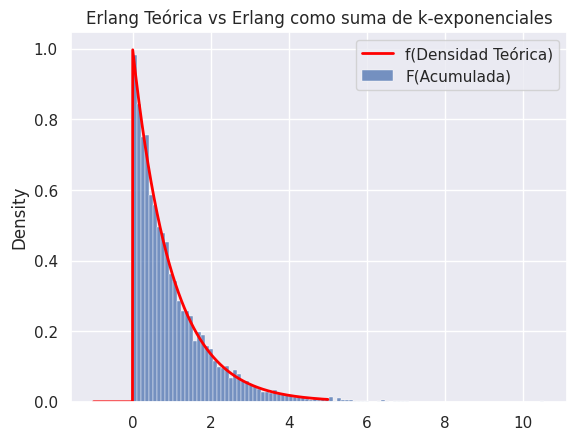

In [ ]:
#Parámetros de la distribución
MU = 1
K = 1
Nsim = 10_000
simulations = [F_Erlang(k=K, mu=MU) for _ in range(Nsim)]

x = np.linspace(-1, 5, 1000)

sns.set_theme(style='darkgrid')
sns.lineplot(x=x, y=Erlang_density(x=x, mu=MU, k=K), linewidth=2, color='red', label="f(Densidad Teórica)")
sns.histplot(simulations, stat='density', label="F(Acumulada)")
plt.legend()
plt.title("Erlang Teórica vs Erlang como suma de k-exponenciales")
plt.show()

---
## DENSIDAD DE WEIBULL

In [5]:
def Weibull_density(x:float, lamda:float, beta:float) -> float:
    """
    Función de densidad de Weibull

    Args:
        x     (float): Valor de entrada a conocer la densidad
        lamda (float): Parámetro de Weibull adicional
        beta  (float): Parámetro de Weibull adicional

    Returns:
        float: Densidad de x
    """
    return np.where(
        (x >= 0) & (lamda > 0) & (beta > 0),
        (beta / lamda) * ((x / lamda) ** (beta-1)) * (e ** -(x / lamda) ** beta),
        0
    )

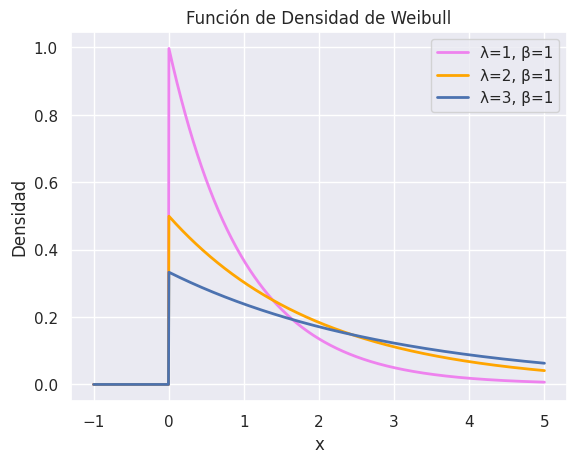

In [42]:
x = np.linspace(-1, 5, 1000)
values_1 = (1, 1) #lamda, beta
values_2 = (2, 1)
values_3 = (3, 1)

sns.set_theme(style='darkgrid')
sns.lineplot(x=x, y=Weibull_density(x=x, lamda=values_1[0], beta=values_1[1]), linewidth=2, color="violet", label="λ=1, β=1")
sns.lineplot(x=x, y=Weibull_density(x=x, lamda=values_2[0], beta=values_2[1]), linewidth=2, color="orange", label="λ=2, β=1")
sns.lineplot(x=x, y=Weibull_density(x=x, lamda=values_3[0], beta=values_3[1]), linewidth=2, label="λ=3, β=1")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.title("Función de Densidad de Weibull")
plt.show()

Para encontrar F para Weibull el proceso es similar al de Pareto, aplicar *transformada inversa*:
Primero debemos encontrar F(x) y luego despejar x en función de U.

Al calcular la función de distribución acumulada (En papel) resulta:
\begin{equation*}
    F(x) = 
    \begin{cases}
    0 & \text{si } x < 1\\[0.4cm]
    1 - e^{-(\frac{x}{\lambda})^\beta} & \text{si }0 \leq x \quad \wedge \quad \lambda,\beta > 0\\[0.4cm]
    1 & \text{si } x\rightarrow \infty
    \end{cases}
\end{equation*}

Al calcular la inversa de $F(x) = U$ donde $U \in [0,1]$ tenemos que:
$$
\displaystyle x = \sqrt[\beta]{-ln(1-U)\cdot \lambda^\beta}
$$

- Como x $\in [0,\infty)$ verifico que la ecuación está en el intervalo.
- Evalúo en $U = 1 - e^{-(\frac{x}{\lambda})^\beta}$ para $x=0, Sup. que \lambda=1 \wedge \beta=1 \text{ y por otro lado }\lim_{x \to \infty} F(X) \wedge \text{también con } \lambda=1 \wedge \beta=1 $ (Los extremos)
- Obtengo que $U = 0 \wedge U=1$ respectivamente 
- Tras evaluar en la ecuacion resulta que está en el intervalo $[0,\infty)$ para todo $U \in [0,1]$

Finalmente el algoritmo para generar la variable aleatoria:

In [2]:
def F_Weibull(lamda:float, beta:float) -> float:
    """
    Función de distribución acumulada de Weibull

    Args:
        lamda (float): Parámetro de Weibull
        beta  (float): Parámetro de Weibull

    Returns:
        float: Valor acumulado
    """
    U = random()
    return (-log(1-U)* (lamda ** beta)) ** (1/beta)

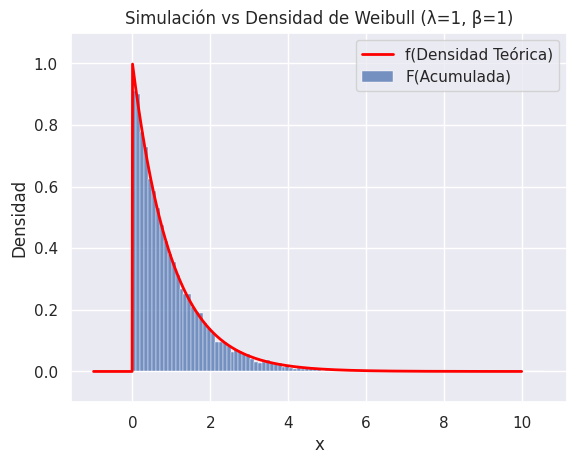

In [ ]:
Nsim = 10_000
lamda = 1
beta = 1
simulations = [F_Weibull(lamda=lamda, beta=beta) for _ in range(Nsim)]

x = np.linspace(-1, 10, 1_000)

sns.set_theme(style='darkgrid')
sns.lineplot(x=x, y=Weibull_density(x=x, lamda=lamda, beta=beta), color='red',linewidth=2, label='f(Densidad Teórica)')
sns.histplot(simulations, stat='density', label='F(Acumulada)')
plt.title("Simulación vs Densidad de Weibull (λ=1, β=1)")
plt.ylim(-0.1,1.1)
plt.legend()
plt.ylabel("Densidad")
plt.xlabel("x")
plt.show()

---
**b)** Estime la media de cada variable con 10.000 repeticiones, usando los parámetros $a = 2$, $\mu = 2$, $k = 2$, $\lambda = 1$,$ \beta = 2$.

Busque en la web los valores de las esperanzas para cada variable con estos parámetros (cuidado con las parametrizaciones) y compare los valores obtenidos.

- PARETO:  $E[X] = \frac{\alpha}{\alpha -1} \\[.5cm]$
- ERLANG:  $E[X] =  k\cdot \mu \\[.5cm]$ 
- WEIBULL: $E[X] =  \lambda \cdot \Gamma(1+\frac{1}{\beta}) \\[.5cm]$


Para estimar la media utilizamos el *método de MonteCarlo* tal que:
$$
\displaystyle \theta = \frac{\sum_{i=1}^N X_i}{N}
$$

Donde:
- N: número de simulaciones.
- X_i: i-ésima muestra generada por una función, en este caso las que simulamos para *Pareto, Weibull y Erlang*



In [10]:
"""
Esperanzas Exactas
"""
def Pareto_hope(alpha:float) -> float:
    return alpha / (alpha - 1) 

def Erlang_hope(k:int, mu:float) -> float:
    return k * mu

def Weibull_hope(lamda:float, beta:float) -> float:
    return lamda * gamma(1+1/beta)

"""
Esperanzas estimadas
"""
def methods_hope_estimate(N, method, *args, **kwargs) -> float:
    samples = [method(*args, **kwargs) for _ in range(N)]
    return np.mean(samples)

#Simulo
N = 10_000

#PARETO
print("="*30)
ALPHA = 2
pareto_estimate = methods_hope_estimate(N, F_Pareto, alpha=ALPHA)
print(f"(PARETO EXACTO) E[X] = {Pareto_hope(alpha=ALPHA)}")
print(f"(PARETO ESTIM.)  θ   = {pareto_estimate:5f}")
print("="*30+"\n")

#ERLANG
print("="*30)
K  = 1  
MU = 1
erlang_estimate = methods_hope_estimate(N, F_Erlang, k=K, mu=MU)
print(f"(ERLANG EXACTO) E[X] = {Erlang_hope(k=K, mu=MU)}")
print(f"(ERLANG ESTIM.)  θ   = {erlang_estimate:5f}")
print("="*30+"\n")

#WEIBULL
print("="*30)
LAMDA = 1
BETA  = 1
weibull_estimate = methods_hope_estimate(N, F_Weibull, lamda=LAMDA, beta=BETA)
print(f"(WEIBULL EXACTO) E[X] = {Weibull_hope(lamda=LAMDA, beta=BETA)}")
print(f"(WEIBULL ESTIM.)  θ   = {weibull_estimate:5f}")
print("="*30+"\n")

(PARETO EXACTO) E[X] = 2.0
(PARETO ESTIM.)  θ   = 1.982962

(ERLANG EXACTO) E[X] = 1
(ERLANG ESTIM.)  θ   = 0.999266

(WEIBULL EXACTO) E[X] = 1.0
(WEIBULL ESTIM.)  θ   = 1.016967

